In [0]:
!pip install tensorflow-gpu

     |████████████████████████████████| 345.2MB 51kB/s 


In [0]:
import tensorflow as tf
print(tf.__version__)

1.13.1


In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


7


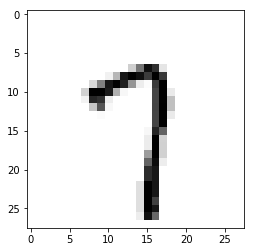

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline 
image_index = 4232
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')

In [0]:
x_train.shape

(60000, 28, 28)

In [0]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
input_shape = (28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape[0])
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: 60000
Number of images in x_train 60000
Number of images in x_test 10000


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(rate = 0.2)) 
model.add(Dense(10,activation=tf.nn.softmax))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Using TensorFlow backend.


In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x = x_train, y = y_train, epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 11s 183us/step - loss: 0.1982 - acc: 0.9397
Epoch 2/10
60000/60000 [==============================] - 7s 114us/step - loss: 0.0802 - acc: 0.9743
Epoch 3/10
60000/60000 [==============================] - 7s 114us/step - loss: 0.0557 - acc: 0.9825
Epoch 4/10
60000/60000 [==============================] - 7s 114us/step - loss: 0.0421 - acc: 0.9864
Epoch 5/10
60000/60000 [==============================] - 7s 124us/step - loss: 0.0354 - acc: 0.9884
Epoch 6/10
60000/60000 [==============================] - 8s 126us/step - loss: 0.0273 - acc: 0.9906
Epoch 7/10
60000/60000 [==============================] - 7s 117us/step - loss: 0.0235 - acc: 0.9919
Epoch 8/10
60000/60000 [==============================] - 8s 135us/step - loss: 0.0216 - acc: 0.9926
Epoch 9/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.0210 - acc: 0.9928
Epoch 10/10
60000/60000 [=================

In [0]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 48us/step


[0.052248561235561285, 0.9878]